# Spectral Analysis

In [1]:
import numpy as np
import nolds
import scipy.io
import mne
import pandas as pd
import seaborn as sns
import pyqtgraph as pg
from scipy.io import loadmat
from scipy import stats
import matplotlib.pyplot as plt
import antropy as ent
from antropy import higuchi_fd
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.computation import RQAComputation
from pyrqa.time_series import TimeSeries
from pyrqa.result import RQAResult
from pyrqa.opencl import OpenCL
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.image_generator import ImageGenerator
import numpy as np
import matplotlib.pyplot as plt
from antropy import higuchi_fd

/home/vincent/miniconda3/lib/python3.10/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [2]:
# Define the file paths
base_dir = '/home/vincent/AAA_projects/MVCS/Neuroscience/DataFrames/' 
eeg_df_path = base_dir + 'eeg_df.csv'

# load data
eeg_df = pd.read_csv(eeg_df_path)

print(eeg_df.head())

            Fp1           Fpz           Fp2           F7         F3  \
0 -21295.988649 -20109.716727 -24153.383752  3189.340060 -45.189275   
1 -21303.747077 -20120.746154 -24163.864012  3178.880909 -56.702035   
2 -21315.466571 -20130.126577 -24171.944343  3164.903807 -69.465350   
3 -21317.809594 -20131.044726 -24174.790986  3159.478572 -73.214591   
4 -21325.798142 -20137.522181 -24179.985166  3144.934679 -84.871628   

            Fz          F4           F8          FC5          FC1  ...  \
0 -8525.066680 -642.128590  3487.913621  6324.956639  6503.012177  ...   
1 -8532.499649 -651.966372  3477.011771  6315.078704  6496.522520  ...   
2 -8544.315275 -663.772856  3463.194795  6302.391524  6483.178723  ...   
3 -8545.873916 -666.109249  3457.870782  6297.212341  6481.970244  ...   
4 -8551.164448 -671.761501  3450.466406  6283.925509  6477.045614  ...   

            P7           P3          Pz           P4           P8  \
0  3374.048029 -3617.197964 -611.584742 -1667.222644  7523.

# Welch's

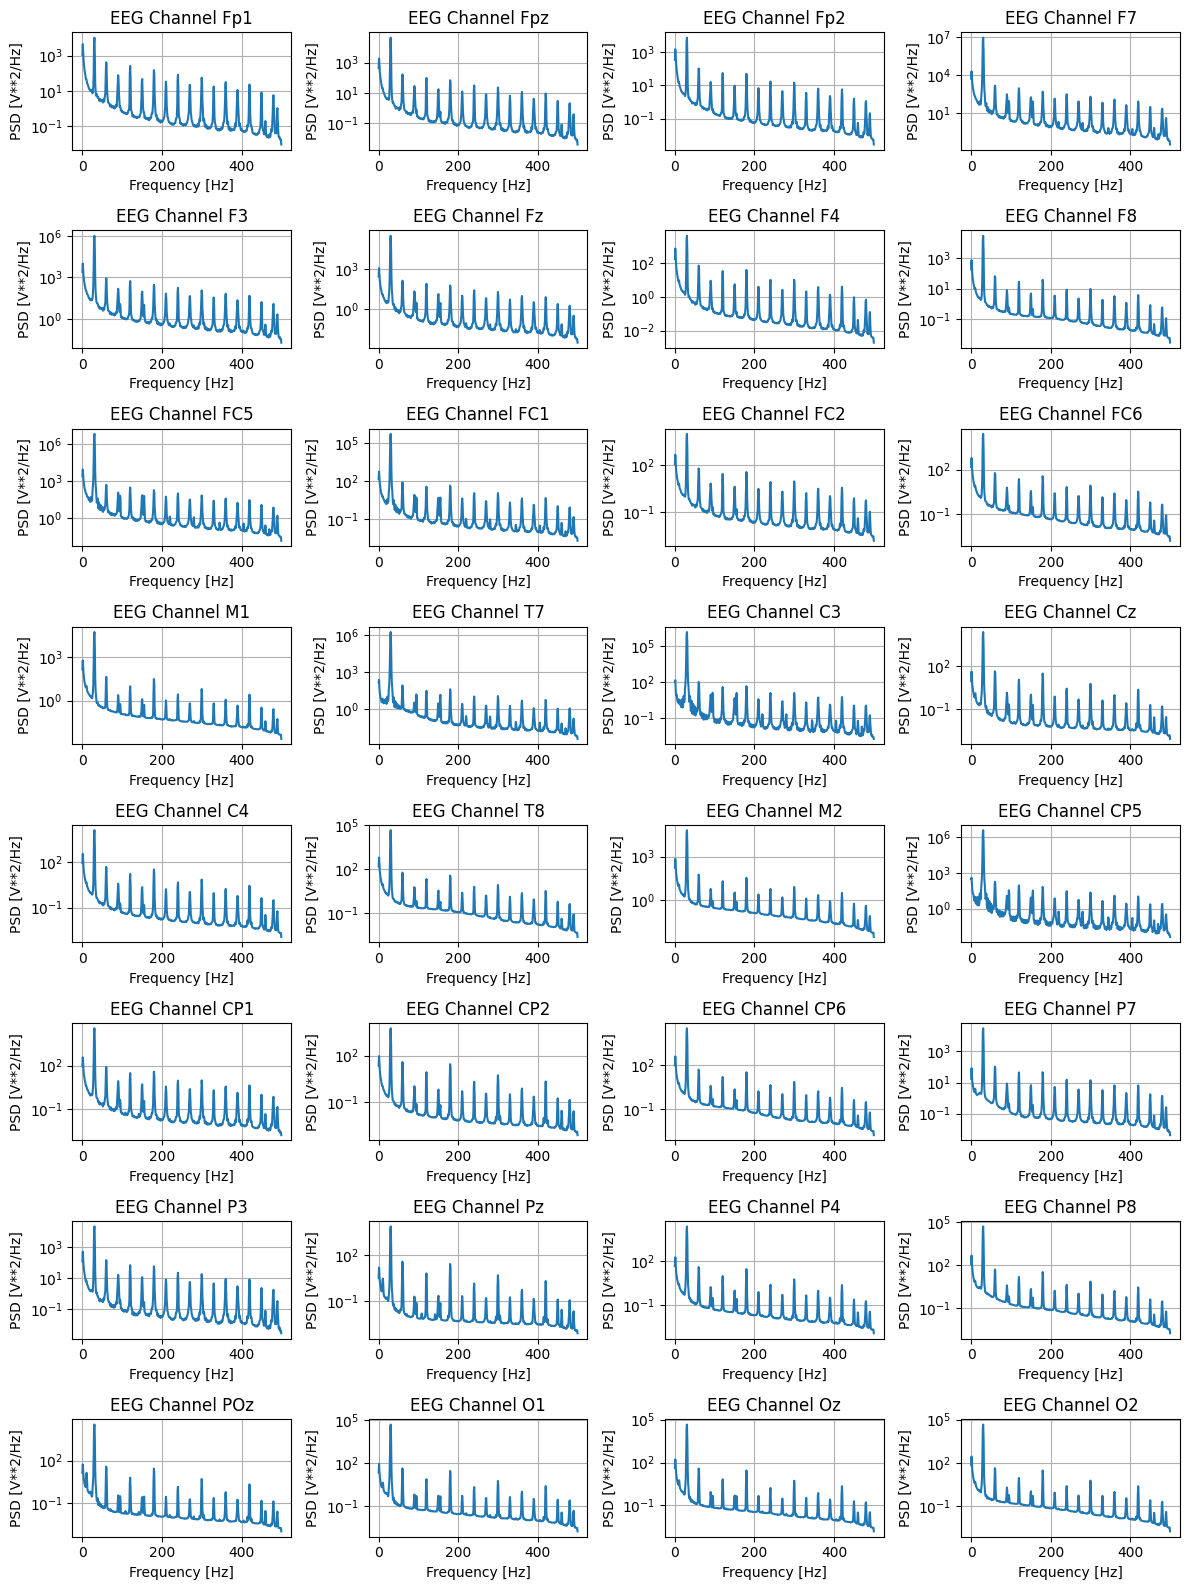

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Define the sampling frequency (if your data is sampled at 1 Hz, set fs to 1)
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Initialize an empty dictionary to store PSD values for each channel
psd_data = {}

# Loop through each EEG channel
for i, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = eeg_df[channel]
    
    # Use Welch's method to estimate the power spectral density
    frequencies, psd = signal.welch(eeg_data, fs, nperseg=1024)
    
    # Store the PSD values in the dictionary
    psd_data[channel] = psd

# Save the PSD data as a numpy array
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/psd_x.npy'
np.save(save_path, psd_data)

# Set up the subplot layout
num_channels = len(eeg_channels)
num_rows = (num_channels + 3) // 4
num_cols = min(num_channels, 4)

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 2 * num_rows))
axs = axs.ravel()

# Loop through each EEG channel and plot the PSD
for i, channel in enumerate(eeg_channels):
    axs[i].semilogy(frequencies, psd_data[channel])
    axs[i].set_title(f'EEG Channel {channel}')
    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('PSD [V**2/Hz]')
    axs[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Create features for the freq bands from Welch's

In [9]:
# Define the sampling frequency
# This depends on how your EEG data was collected.
# For example, if a data point was collected every second, fs would be 1.
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Use Welch's method to estimate the power spectral density
frequencies, psd = signal.welch(eeg_data, fs, nperseg=1024)

# Define frequency bands of interest (you can adjust these according to your requirements)
delta_band = (1, 4)    # Delta band (1-4 Hz)
theta_band = (4, 8)    # Theta band (4-8 Hz)
alpha_band = (8, 13)   # Alpha band (8-13 Hz)
beta_band = (13, 30)   # Beta band (13-30 Hz)

# Find indices corresponding to each frequency band
delta_indices = np.where((frequencies >= delta_band[0]) & (frequencies <= delta_band[1]))[0]
theta_indices = np.where((frequencies >= theta_band[0]) & (frequencies <= theta_band[1]))[0]
alpha_indices = np.where((frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]))[0]
beta_indices = np.where((frequencies >= beta_band[0]) & (frequencies <= beta_band[1]))[0]

# Extract power values for each frequency band
delta_power = np.nanmean(psd[delta_indices])
theta_power = np.nanmean(psd[theta_indices])
alpha_power = np.nanmean(psd[alpha_indices])
beta_power = np.nanmean(psd[beta_indices])

# Create a feature array from the power values
features = np.array([delta_power, theta_power, alpha_power, beta_power])

# Save the features as a numpy array
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/welchs_x.npy'
np.save(save_path, features)

# Fast Fourier Transform

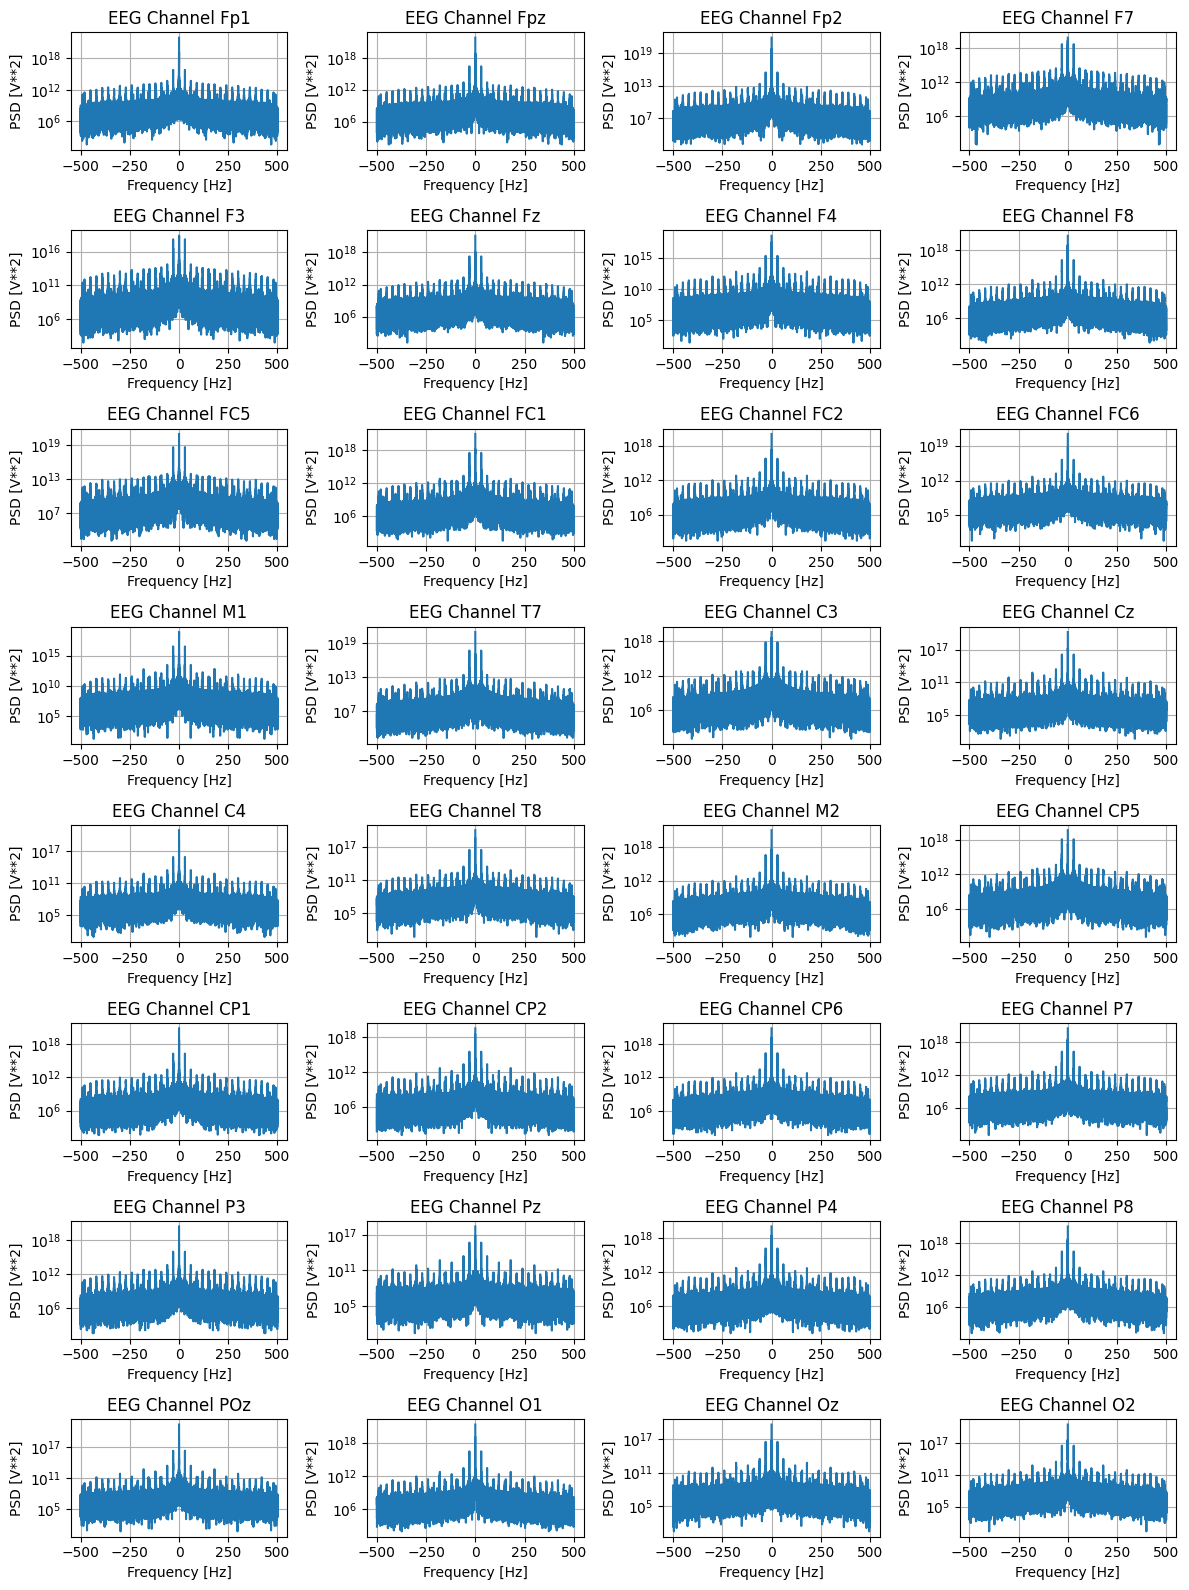

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling frequency
# This depends on how your EEG data was collected.
# For example, if a data point was collected every second, fs would be 1.
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Initialize an empty dictionary to store FFT PSD values for each channel
fft_psd_data = {}

# Set up the subplot layout
num_channels = len(eeg_channels)
num_rows = (num_channels + 3) // 4
num_cols = min(num_channels, 4)

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 2 * num_rows))
axs = axs.ravel()

# Loop through each EEG channel
for i, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = eeg_df[channel]
    
    # Compute the FFT
    fft_result = np.fft.fft(eeg_data)
    frequencies = np.fft.fftfreq(len(fft_result), d=1/fs)
    psd = np.abs(fft_result) ** 2
    
    # Store the PSD values in the dictionary
    fft_psd_data[channel] = psd
    
    # Plot the power spectral density for the current channel
    axs[i].semilogy(frequencies, psd)
    axs[i].set_title(f'EEG Channel {channel}')
    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('PSD [V**2]')
    axs[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Save the FFT PSD data as a single numpy file
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/fft_psd_x.npy'
np.save(save_path, fft_psd_data)

# Lomb-Scargle periodogram

In [ ]:
from scipy.signal import lombscargle
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling frequency
# This depends on how your EEG data was collected.
# For example, if a data point was collected every second, fs would be 1.
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Set up the subplot layout
num_channels = len(eeg_channels)
num_rows = (num_channels + 3) // 4
num_cols = min(num_channels, 4)

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 2 * num_rows))
axs = axs.ravel()

# Loop through each EEG channel
for i, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = eeg_df[channel]
    
    # Create a time array for the data
    time = np.arange(len(eeg_data)) / fs
    
    # Define the frequencies at which to compute the Lomb-Scargle periodogram
    # Update the frequency range to exclude zero frequency
    frequencies = np.linspace(0.001, 500, 1000)
    
    # Compute the Lomb-Scargle periodogram
    LombScarglePeriodogram = lombscargle(time, eeg_data, frequencies, normalize=True)
    
    # Plot the Lomb-Scargle periodogram for the current channel
    axs[i].semilogy(frequencies, LombScarglePeriodogram)
    axs[i].set_title(f'EEG Channel {channel}')
    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Power Spectral Density')
    axs[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Save the Lomb-Scargle periodogram as a numpy array for each channel
for channel in eeg_channels:
    eeg_data = eeg_df[channel]
    time = np.arange(len(eeg_data)) / fs
    frequencies = np.linspace(0.001, 500, 1000)
    LombScarglePeriodogram = lombscargle(time, eeg_data, frequencies, normalize=True)
    feature_array = np.column_stack((frequencies, LombScarglePeriodogram))
    save_path = f'/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/LombScarglePeriodogram_x_{channel}.npy'
    np.save(save_path, feature_array)

# Wavelet Transform

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Define the sampling frequency
# This depends on how your EEG data was collected.
# For example, if a data point was collected every second, fs would be 1.
fs = 1000

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Set up the subplot layout
num_channels = len(eeg_channels)
num_rows = (num_channels + 3) // 4
num_cols = min(num_channels, 4)

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 2 * num_rows))
axs = axs.ravel()

# Loop through each EEG channel
for i, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = eeg_df[channel]
    
    # Create a time array for the data
    time = np.arange(len(eeg_data)) / fs
    
    # Define the frequencies at which to compute the wavelet transform
    frequencies = np.logspace(np.log10(0.1), np.log10(30), num=100)
    
    # Compute the continuous wavelet transform (CWT)
    coefficients, frequencies = pywt.cwt(eeg_data, frequencies, wavelet='morl')
    
    # Calculate the power spectral density from the CWT coefficients
    psd = np.abs(coefficients)**2
    
    # Plot the wavelet transform power spectral density for the current channel
    axs[i].imshow(psd, extent=[0, len(eeg_data), frequencies[-1], frequencies[0]],
                  aspect='auto', cmap='inferno')
    axs[i].set_title(f'EEG Channel {channel}')
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel('Frequency [Hz]')
    axs[i].grid(False)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Save the wavelet transform power spectral density as a numpy array for each channel
for channel in eeg_channels:
    eeg_data = eeg_df[channel]
    time = np.arange(len(eeg_data)) / fs
    frequencies = np.logspace(np.log10(0.1), np.log10(30), num=100)
    coefficients, _ = pywt.cwt(eeg_data, frequencies, wavelet='morl')
    psd = np.abs(coefficients)**2
    feature_array = psd
    save_path = f'/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/wavelet_X_{channel}.npy'
    np.save(save_path, feature_array)

# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Loop through each EEG channel
for channel in eeg_channels:
    # Select EEG data from the current channel
    eeg_data = eeg_df[channel]
    
    # Create a figure and axes for the subplot
    fig, axs = plt.subplots(2, 1, figsize=(8, 6))
    
    # Plot the ACF and PACF for the current channel
    plot_acf(eeg_data, lags=10, ax=axs[0])
    axs[0].set_title(f'ACF for EEG Channel {channel}')
    
    plot_pacf(eeg_data, lags=10, ax=axs[1])
    axs[1].set_title(f'PACF for EEG Channel {channel}')
    
    # Save the combined ACF and PACF plot as an image file
    save_path = f'/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/acf_pacf_x_{channel}.png'
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()  # Close the figure to free up memory

# Display the plots
plt.show()

# Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# List of EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Set up the subplot layout
num_channels = len(eeg_channels)
num_rows = (num_channels + 3) // 4
num_cols = min(num_channels, 4)

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 2 * num_rows))
axs = axs.ravel()

# Loop through each EEG channel
for i, channel in enumerate(eeg_channels):
    # Select EEG data from the current channel
    eeg_data = eeg_df[channel]
    
    # Define a range of lag values to consider
    lag_values = range(1, 21)  # e.g., consider lag values from 1 to 20
    
    # Initialize lists to store the AIC and BIC values for each lag value
    aic_values = []
    bic_values = []
    
    # For each lag value, fit the AutoReg model and calculate AIC and BIC
    for lag in lag_values:
        mod = AutoReg(eeg_data.values, lag, old_names=False)
        res = mod.fit()
        aic_values.append(res.aic)
        bic_values.append(res.bic)
    
    # Plot the AIC and BIC values for the current channel
    axs[i].plot(lag_values, aic_values, label='AIC')
    axs[i].plot(lag_values, bic_values, label='BIC')
    axs[i].set_title(f'EEG Channel {channel}')
    axs[i].set_xlabel('Lag')
    axs[i].set_ylabel('Information Criterion')
    axs[i].legend()
    axs[i].grid()
    
    # Save the AIC and BIC values as numpy arrays
    save_path_aic = f'/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/aic_x_{channel}.npy'
    save_path_bic = f'/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/bic_x_{channel}.npy'
    np.save(save_path_aic, aic_values)
    np.save(save_path_bic, bic_values)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# Define a range of lag values to consider
lag_values = range(1, 21)  # e.g., consider lag values from 1 to 20

# Initialize dictionaries to store the AIC and BIC values for each EEG channel
aic_values_dict = {}
bic_values_dict = {}

# Loop through each EEG channel
for channel in eeg_channels:
    # Select EEG data from the current channel
    eeg_data = eeg_df[channel]
    
    # Initialize lists to store the AIC and BIC values for the current channel
    aic_values = []
    bic_values = []
    
    # For each lag value, fit the AutoReg model and calculate AIC and BIC
    for lag in lag_values:
        mod = AutoReg(eeg_data.values, lag, old_names=False)
        res = mod.fit()
        aic_values.append(res.aic)
        bic_values.append(res.bic)
    
    # Store the AIC and BIC values in the dictionaries
    aic_values_dict[channel] = aic_values
    bic_values_dict[channel] = bic_values

# Save the AIC and BIC values for all EEG channels as a single numpy file
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/ar_model_aic_bic_x.npy'
np.savez(save_path, aic_values_dict=aic_values_dict, bic_values_dict=bic_values_dict)

In [57]:
# Akaike Information Criterion
aic = res.aic
print("AIC: ", aic)

# Bayesian Information Criterion
bic = res.bic
print("BIC: ", bic)

AIC:  44052781.082328126
BIC:  44053072.74039268


In [59]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# Select EEG data from the 'Fp1' channel
eeg_data_fp1 = eeg_df['Fp1']

# Define a range of lag values to consider
lag_values = range(1, 21)  # e.g., consider lag values from 1 to 20

# Initialize lists to store the AIC and BIC values for each lag value
aic_values = []
bic_values = []

# Split the data into training and testing sets
train_data = eeg_data_fp1.iloc[:num_train]
test_data = eeg_data_fp1.iloc[num_train:]

# For each lag value, fit the AutoReg model and calculate AIC and BIC
for lag in lag_values:
    mod = AutoReg(train_data.values, lag, old_names=False)
    res = mod.fit()

    # Compute AIC and BIC
    aic = res.aic
    bic = res.bic

    aic_values.append(aic)
    bic_values.append(bic)

# Print the AIC and BIC values for each lag value
for lag, aic, bic in zip(lag_values, aic_values, bic_values):
    print(f"Lag: {lag}, Akaike Information Criterion: {aic}, Bayesian Information Criterion: {bic}")


Lag: 1, Akaike Information Criterion: 45538018.13133216, Bayesian Information Criterion: 45538057.90282894
Lag: 2, Akaike Information Criterion: 45354812.458312914, Bayesian Information Criterion: 45354865.486974336
Lag: 3, Akaike Information Criterion: 45327707.62335169, Bayesian Information Criterion: 45327773.909177296
Lag: 4, Akaike Information Criterion: 45204804.80812134, Bayesian Information Criterion: 45204884.35111064
Lag: 5, Akaike Information Criterion: 45202475.56207633, Bayesian Information Criterion: 45202568.362228855
Lag: 6, Akaike Information Criterion: 45131182.69996718, Bayesian Information Criterion: 45131288.757282466
Lag: 7, Akaike Information Criterion: 45130839.45008384, Bayesian Information Criterion: 45130958.7645614
Lag: 8, Akaike Information Criterion: 45119962.032430984, Bayesian Information Criterion: 45120094.60407036
Lag: 9, Akaike Information Criterion: 45090555.611475796, Bayesian Information Criterion: 45090701.4402765
Lag: 10, Akaike Information Crit

In [61]:
# Choose the best lag based on the lowest AIC value
best_lag_aic = np.argmin(aic_values) + 1

# Choose the best lag based on the lowest BIC value
best_lag_bic = np.argmin(bic_values) + 1

print("Best lag based on AIC:", best_lag_aic)
print("Best lag based on BIC:", best_lag_bic)

Best lag based on AIC: 20
Best lag based on BIC: 20


# Autoregressive (AR) modeling

In [82]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Select EEG data from the 'Fp1' channel
eeg_data_fp1 = eeg_df['Fp1']

# Fit the AutoReg model with the desired lag (e.g., AR(20) in this example) on the entire data
lag = 20
mod = AutoReg(eeg_data_fp1.values, lag, old_names=False)
res = mod.fit()

# Given sampling frequency (fs)
fs = 1000

# Calculate the number of periods for 30-second interval
periods_for_30_seconds = int(30 * fs)

# Create a fixed frequency time index for the predicted values with 30-second intervals
# Create the prediction index
time_index_predict = range(len(eeg_data_fp1), len(eeg_data_fp1)+periods_for_30_seconds)

# Use the fitted model to make predictions at 30-second intervals for the entire dataset
predictions = res.predict(start=len(eeg_data_fp1), end=len(eeg_data_fp1)+periods_for_30_seconds-1, dynamic=True)

# Print some of the original and predicted values
print("True values:", eeg_data_fp1.values)
print("Predicted values:", predictions)

# Save the predictions as a numpy array
np.save('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/AutoRegressive_x.npy', predictions)

True values: [-21295.98864928 -21303.74707676 -21315.46657134 ... -17286.89230419
 -17281.27799398 -17330.52269117]
Predicted values: [-17355.23130181 -17325.60421533 -17314.92757538 ... -20136.5104644
 -20136.51735521 -20136.52424509]


# Band Power

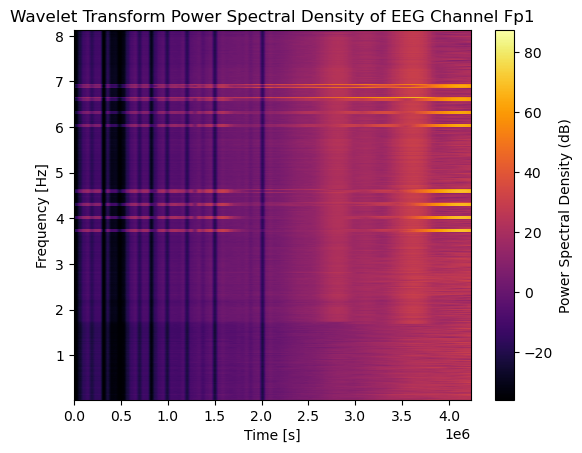

Delta Band Power: [8.09510191e+08 1.37909164e+09 9.73658635e+08 ... 6.29994850e+08
 9.08832779e+08 5.09791836e+08]
Theta Band Power: [2.36880844e+06 1.09386853e+00 7.48602713e-01 ... 1.93163196e-01
 1.39389281e+01 1.70400754e+06]
Alpha Band Power: [0. 0. 0. ... 0. 0. 0.]
Beta Band Power: [0. 0. 0. ... 0. 0. 0.]
Gamma Band Power: [0. 0. 0. ... 0. 0. 0.]


In [88]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Select EEG data from the 'Fp1' channel
eeg_data = eeg_df['Fp1']

# Define the sampling frequency (if your data is sampled at 1 Hz, set fs to 1)
fs = 1000

# Create a time array for the data
time = np.arange(len(eeg_data)) / fs

# Define the frequencies at which to compute the wavelet transform
frequencies = np.logspace(np.log10(0.1), np.log10(30), num=100)

# Compute the continuous wavelet transform (CWT)
coefficients, frequencies = pywt.cwt(eeg_data, frequencies, wavelet='morl')

# Calculate the power spectral density from the CWT coefficients
psd = np.abs(coefficients)**2

# Define the frequency bands for band power calculation
delta_band = (0.1, 4)   # Delta band: 0.1 Hz to 4 Hz
theta_band = (4, 8)     # Theta band: 4 Hz to 8 Hz
alpha_band = (8, 13)    # Alpha band: 8 Hz to 13 Hz
beta_band = (13, 30)    # Beta band: 13 Hz to 30 Hz
gamma_band = (30, 100)  # Gamma band: 30 Hz to 100 Hz

# Find the frequency indices corresponding to the specified frequency bands
delta_indices = (frequencies >= delta_band[0]) & (frequencies <= delta_band[1])
theta_indices = (frequencies >= theta_band[0]) & (frequencies <= theta_band[1])
alpha_indices = (frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1])
beta_indices = (frequencies >= beta_band[0]) & (frequencies <= beta_band[1])
gamma_indices = (frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1])

# Transpose the psd array to have dimensions of (n_frequencies, n_channels)
psd = psd.T

# Calculate the band power by integrating the PSD over the frequency bands
delta_power = np.trapz(psd[:, delta_indices], axis=1)
theta_power = np.trapz(psd[:, theta_indices], axis=1)
alpha_power = np.trapz(psd[:, alpha_indices], axis=1)
beta_power = np.trapz(psd[:, beta_indices], axis=1)
gamma_power = np.trapz(psd[:, gamma_indices], axis=1)

# Apply a logarithmic scale to the power values to avoid dominating the colormap
psd_log = 10 * np.log10(psd)

# Set a lower threshold for the colormap
threshold = np.percentile(psd_log, 5)
psd_log[psd_log < threshold] = threshold

# Plot the power spectral density as a heatmap
plt.imshow(psd_log, extent=[0, len(eeg_data), frequencies[-1], frequencies[0]], aspect='auto', cmap='inferno')
plt.colorbar(label='Power Spectral Density (dB)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Wavelet Transform Power Spectral Density of EEG Channel Fp1')
plt.show()

# Print the calculated band powers
print("Delta Band Power:", delta_power)
print("Theta Band Power:", theta_power)
print("Alpha Band Power:", alpha_power)
print("Beta Band Power:", beta_power)
print("Gamma Band Power:", gamma_power)

# Save the band powers as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "BandPower_x.npy"
results_dict = {
    "delta_power": delta_power,
    "theta_power": theta_power,
    "alpha_power": alpha_power,
    "beta_power": beta_power,
    "gamma_power": gamma_power
}

np.save(results_path + results_file, results_dict)

# Short-Time Fourier Transform

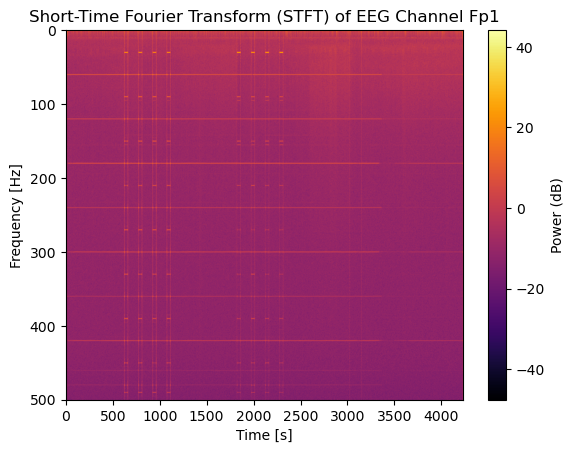

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Select EEG data from the 'Fp1' channel
eeg_data = eeg_df['Fp1']

# Define the sampling frequency (if your data is sampled at 1 Hz, set fs to 1)
fs = 1000

# Define the window size for STFT (in samples)
window_size = int(fs * 2)  # 2 seconds window

# Calculate the STFT
frequencies, time_intervals, stft_data = stft(eeg_data, fs=fs, nperseg=window_size)

# Convert the power data to dB
stft_log = 10 * np.log10(np.abs(stft_data))

# Save the STFT data as a NumPy array
np.save('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/ShortTimeFourier_x.npy', stft_data)

# Plot the STFT as a heatmap
plt.imshow(stft_log, aspect='auto', cmap='inferno', extent=[time_intervals[0], time_intervals[-1], frequencies[-1], frequencies[0]])
plt.colorbar(label='Power (dB)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Short-Time Fourier Transform (STFT) of EEG Channel Fp1')
plt.show()

# Spectral Entropy

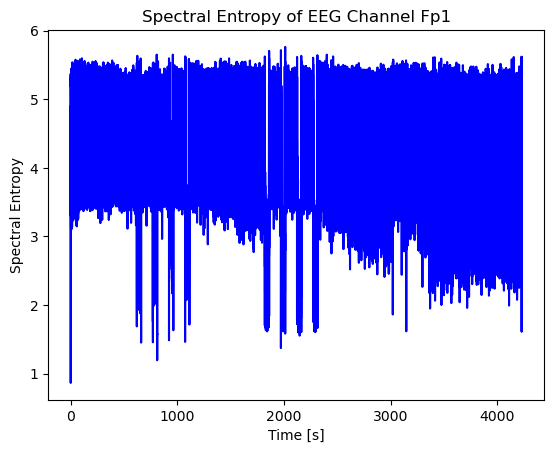

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import stft

# Define the function to compute Spectral Entropy
def spectral_entropy(psd):
    # Normalize the PSD
    normalized_psd = psd / np.sum(psd, axis=0)
    
    # Compute Spectral Entropy
    spectral_entropy = -np.sum(normalized_psd * np.log2(normalized_psd), axis=0)
    
    return spectral_entropy

# Select EEG data from the 'Fp1' channel
eeg_data = eeg_df['Fp1']

# Define the sampling frequency (if your data is sampled at 1 Hz, set fs to 1)
fs = 1000

# Create a time array for the data
time = np.arange(len(eeg_data)) / fs

# Define the frequencies at which to compute the wavelet transform
frequencies = np.logspace(np.log10(0.1), np.log10(30), num=100)

# Compute the continuous wavelet transform (CWT)
coefficients, frequencies = pywt.cwt(eeg_data, frequencies, wavelet='morl')

# Calculate the power spectral density from the CWT coefficients
psd = np.abs(coefficients)**2

# Calculate the Spectral Entropy
spectral_entropy_values = spectral_entropy(psd)

# Save the Spectral Entropy data as a NumPy array
np.save('/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/spectral_entropy_x.npy', spectral_entropy_values)

# Plot the Spectral Entropy
plt.plot(time, spectral_entropy_values, color='blue')
plt.xlabel('Time [s]')
plt.ylabel('Spectral Entropy')
plt.title('Spectral Entropy of EEG Channel Fp1')
plt.show()

# Coherence

In [96]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']

# Define the sampling frequency
fs = 1000

# Create a time array for the data
time = np.arange(len(eeg_df[eeg_channels[0]])) / fs

# Define the frequencies at which to compute the wavelet transform
frequencies = np.logspace(np.log10(10), np.log10(fs/2), num=100)  # Adjust the scale range as needed

# Initialize a dictionary to store the coherence results for each channel pair
coherence_results = {}

# Loop through each channel and calculate coherence with other channels
for channel1 in eeg_channels:
    eeg_data1 = eeg_df[channel1]
    coefficients1, frequencies = pywt.cwt(eeg_data1, frequencies, wavelet='morl')
    psd1 = np.abs(coefficients1)**2

    # Initialize a list to store coherence results for the current channel
    channel_coherence = []

    for channel2 in eeg_channels:
        eeg_data2 = eeg_df[channel2]
        coefficients2, frequencies = pywt.cwt(eeg_data2, frequencies, wavelet='morl')
        psd2 = np.abs(coefficients2)**2

        # Compute the cross-power spectral density between channel1 and channel2
        cross_psd = np.conj(coefficients1) * coefficients2

        # Compute the coherence between channel1 and channel2
        coherence = np.abs(cross_psd)**2 / (psd1 * psd2)

        # Add the coherence to the list for the current channel
        channel_coherence.append(coherence)

    # Convert the list of coherences to a 2D array and store in the dictionary
    coherence_results[channel1] = np.array(channel_coherence)

# Set a lower threshold for the colormap
for channel in coherence_results:
    threshold = np.percentile(coherence_results[channel], 5)
    coherence_results[channel][coherence_results[channel] < threshold] = threshold

# Plot and save the coherence for each channel pair (Optional)
for channel1 in eeg_channels:
    for channel2 in eeg_channels:
        coherence = coherence_results[channel1][eeg_channels.index(channel2)]
        plt.imshow(coherence, extent=[0, len(eeg_data1), frequencies[-1], frequencies[0]], aspect='auto', cmap='inferno')
        plt.colorbar(label='Coherence')
        plt.xlabel('Time [s]')
        plt.ylabel('Frequency [Hz]')
        plt.title(f'Coherence between EEG Channels {channel1} and {channel2}')
        plt.show()

# Save the coherence results as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "Coherence_results.npy"
np.save(results_path + results_file, coherence_results)


KeyboardInterrupt: 

# Spectral Centroids

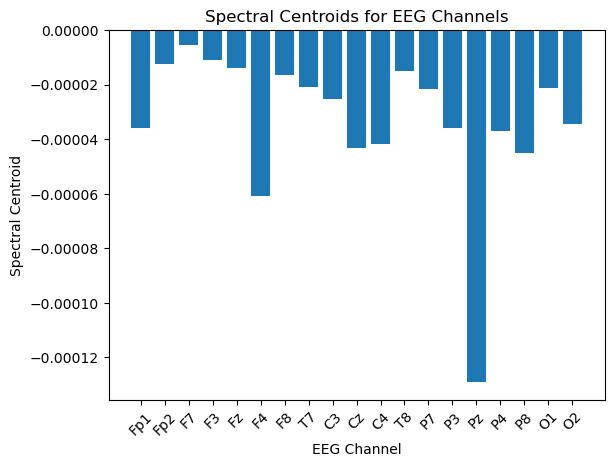

In [98]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']

# Define the sampling frequency
fs = 1000

# Initialize a dictionary to store the spectral centroids for each channel
spectral_centroids = {}

# Loop through each channel and calculate spectral centroid
for channel in eeg_channels:
    eeg_data = eeg_df[channel].to_numpy()  # Convert to NumPy array
    
    # Perform Fourier transform on the data
    fft_result = scipy.fft.fft(eeg_data)
    
    # Generate frequencies associated with the Fourier transform values
    frequencies = scipy.fft.fftfreq(len(eeg_data), 1.0/fs)

    # Calculate the absolute values of the Fourier transform results
    magnitude = np.abs(fft_result)
    
    # Compute the spectral centroid
    spectral_centroid = np.sum(frequencies * magnitude) / np.sum(magnitude)
    
    # Add the spectral centroid to the dictionary
    spectral_centroids[channel] = spectral_centroid

# Now, you have the spectral_centroids dictionary that contains spectral centroids for each channel

# Save the spectral centroid results as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "SpectralCentroids_x.npy"
np.save(results_path + results_file, spectral_centroids)


# Plot the spectral centroids for each EEG channel
plt.bar(spectral_centroids.keys(), spectral_centroids.values())
plt.xlabel('EEG Channel')
plt.ylabel('Spectral Centroid')
plt.title('Spectral Centroids for EEG Channels')
plt.xticks(rotation=45)
plt.show()

# Frequency of Maximum Power

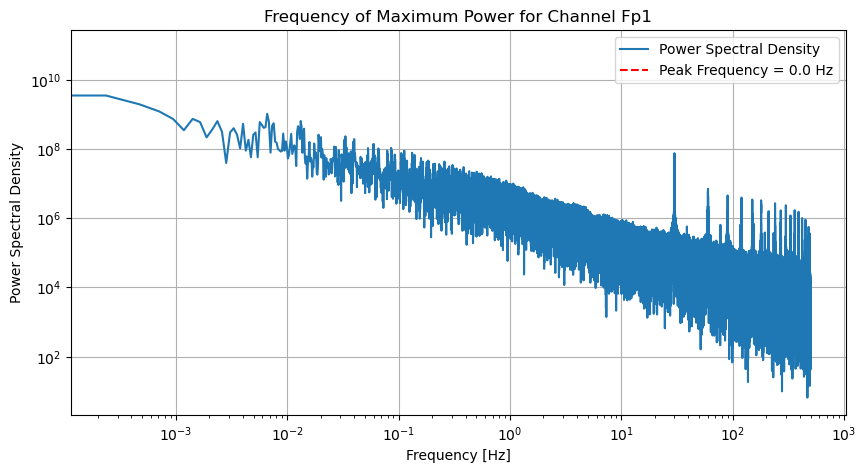

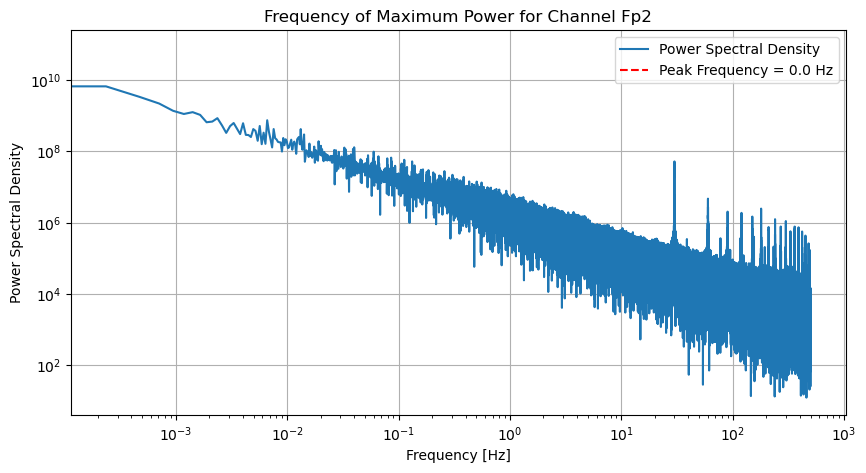

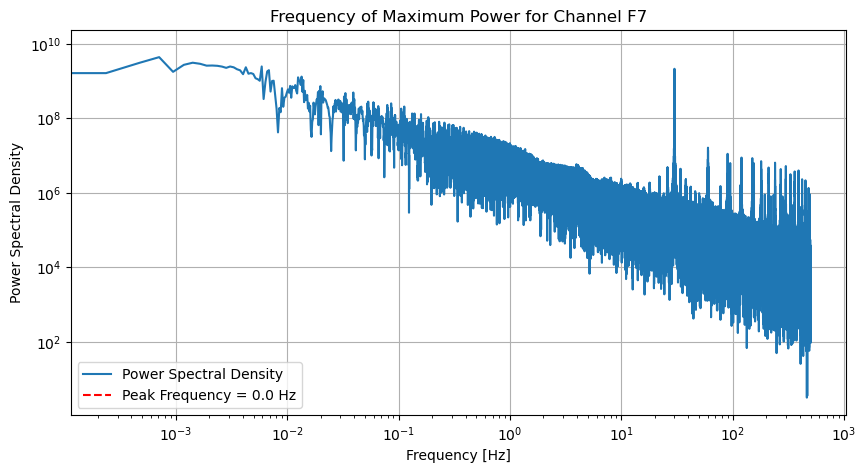

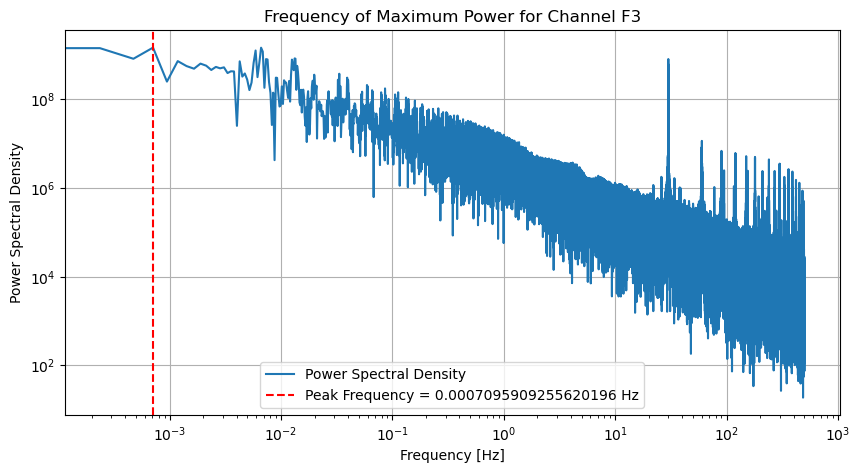

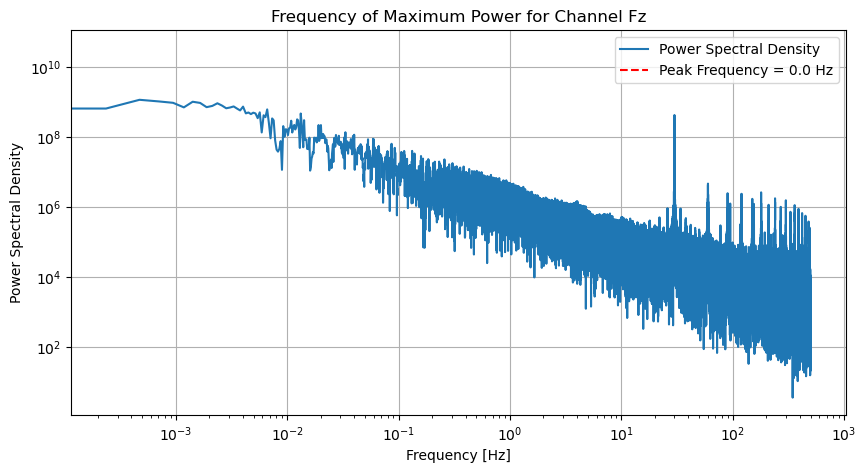

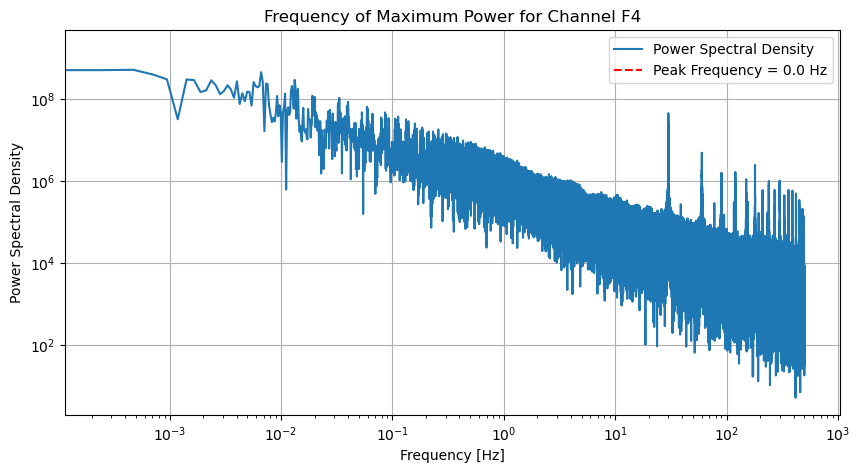

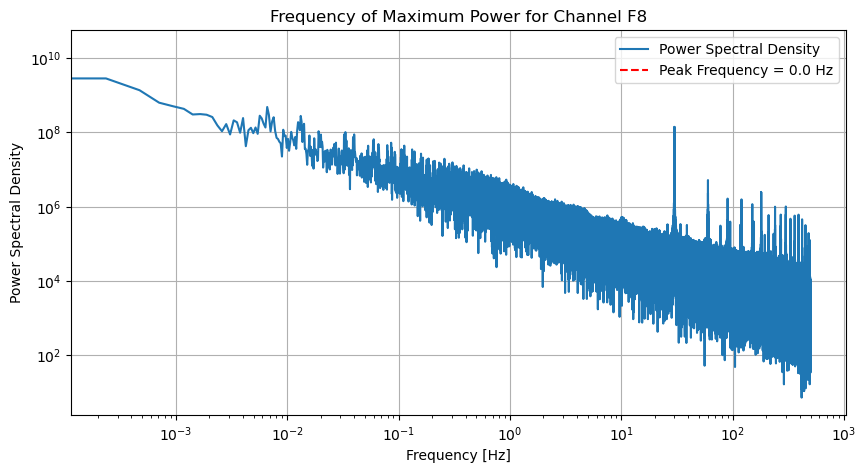

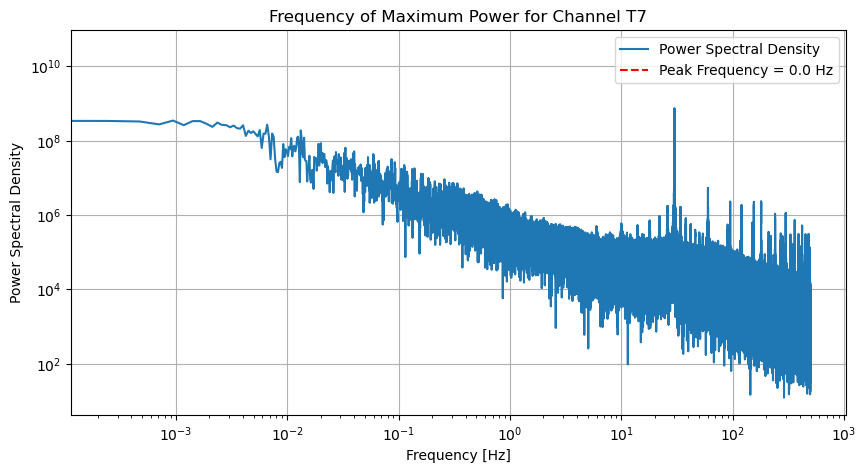

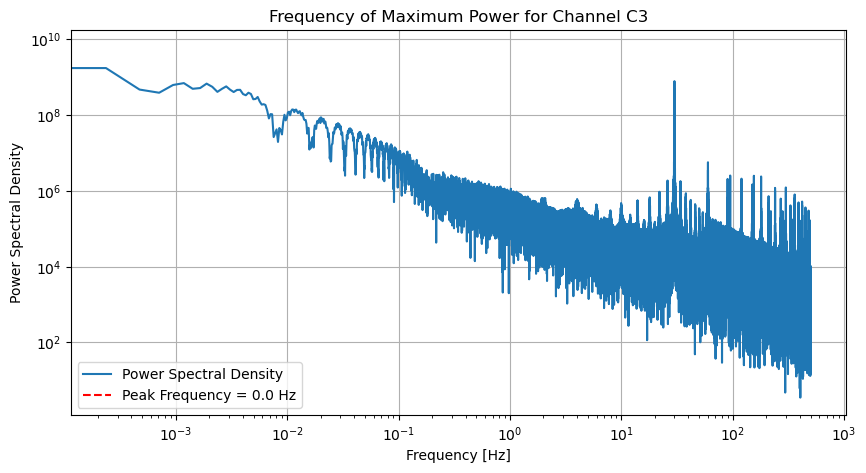

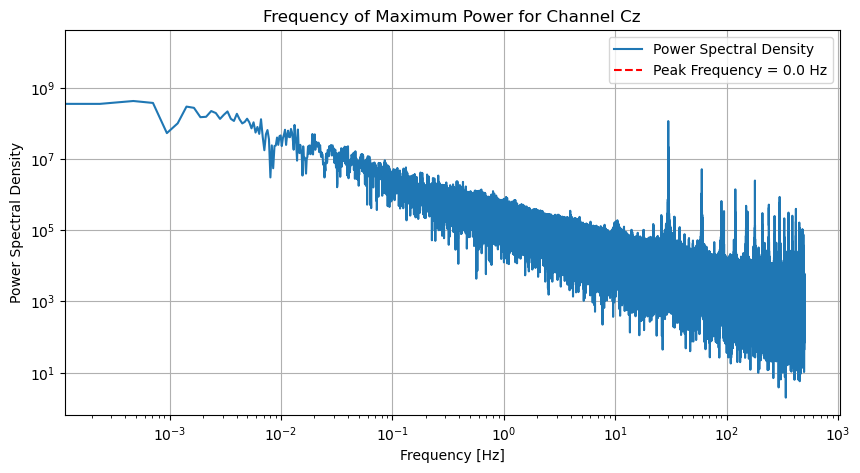

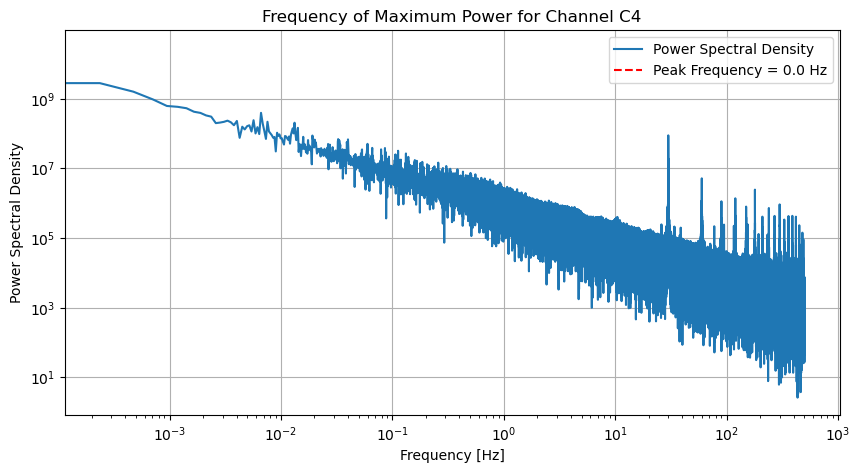

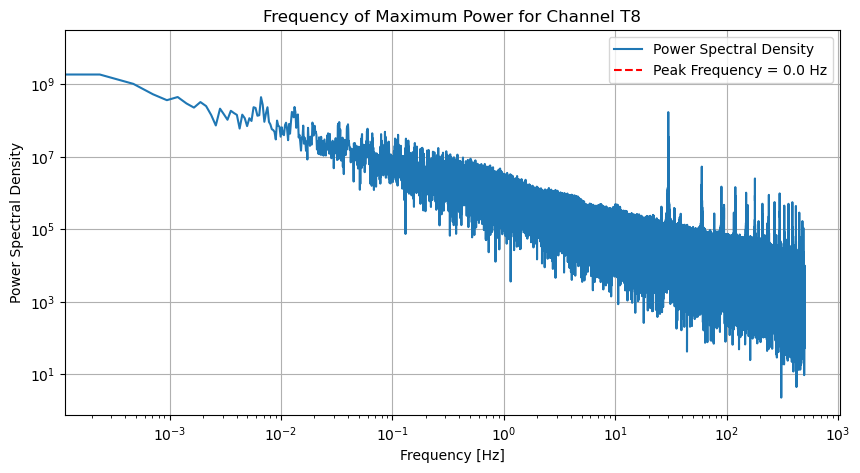

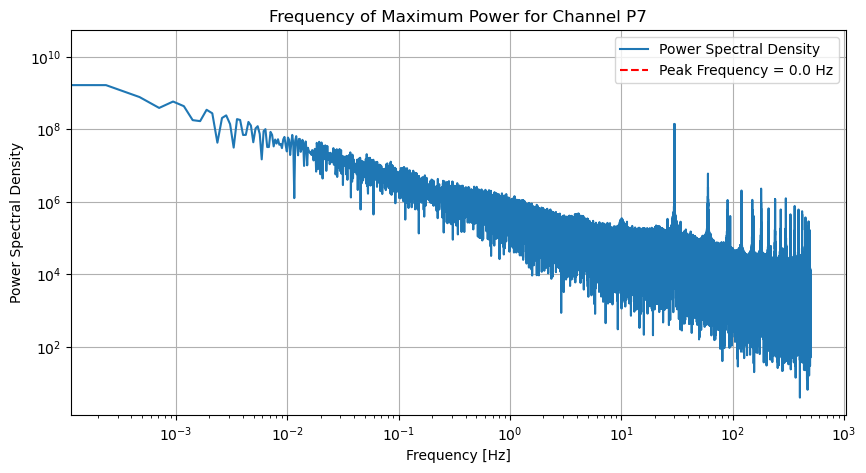

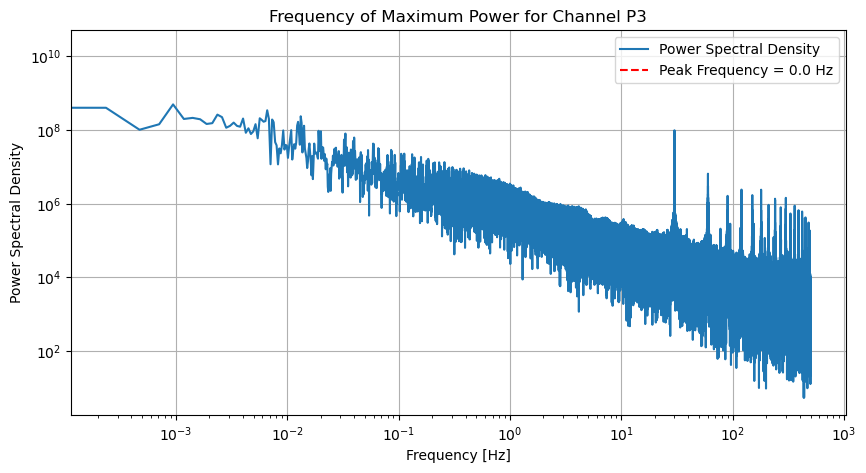

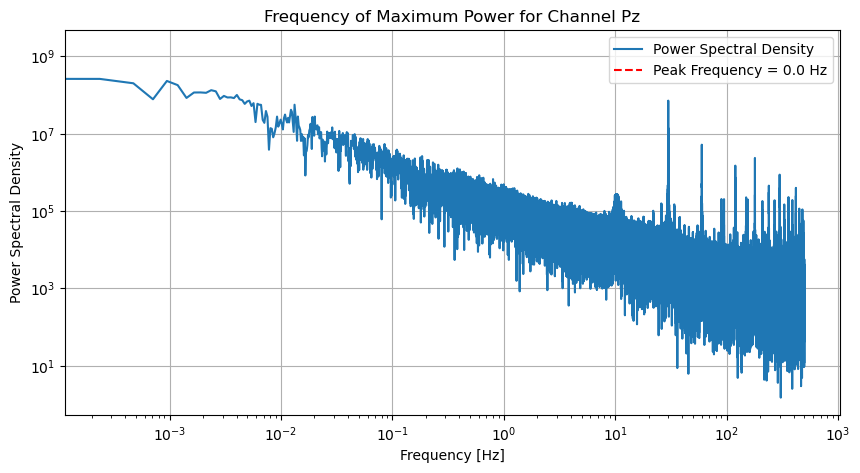

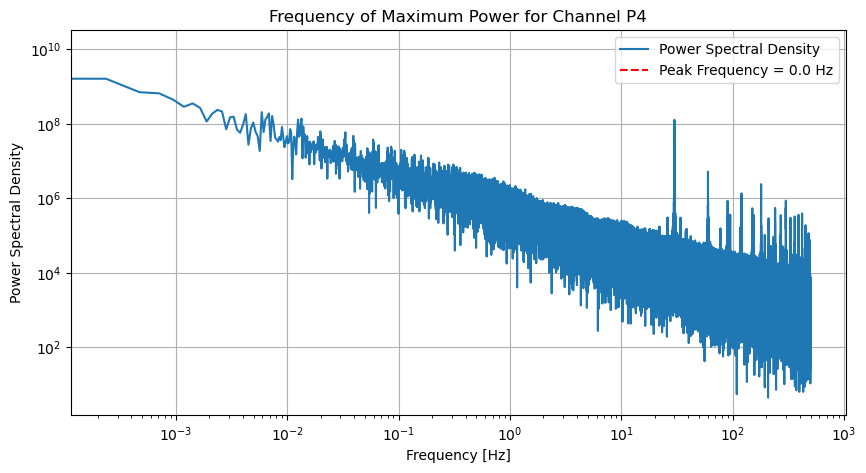

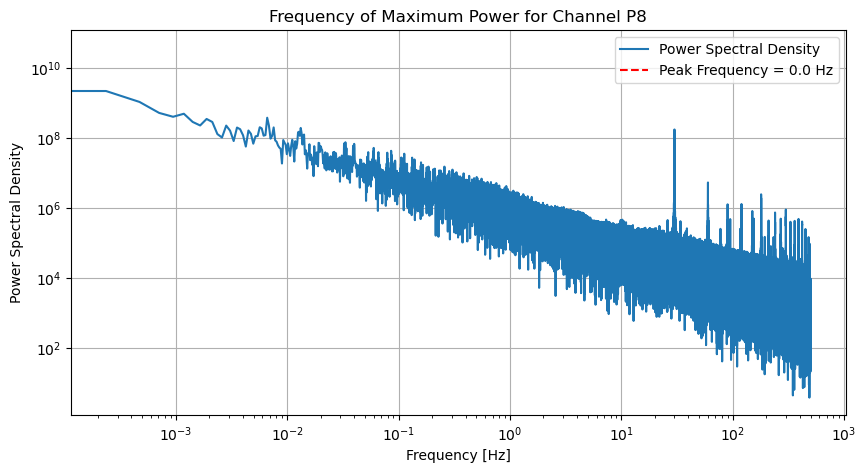

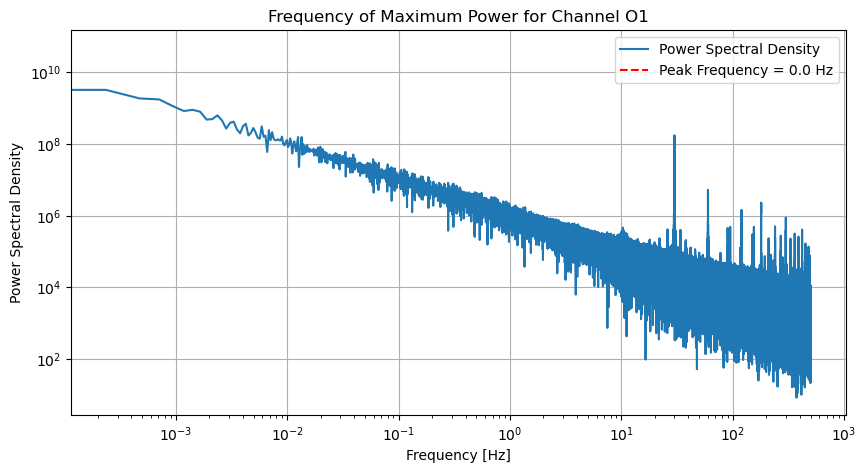

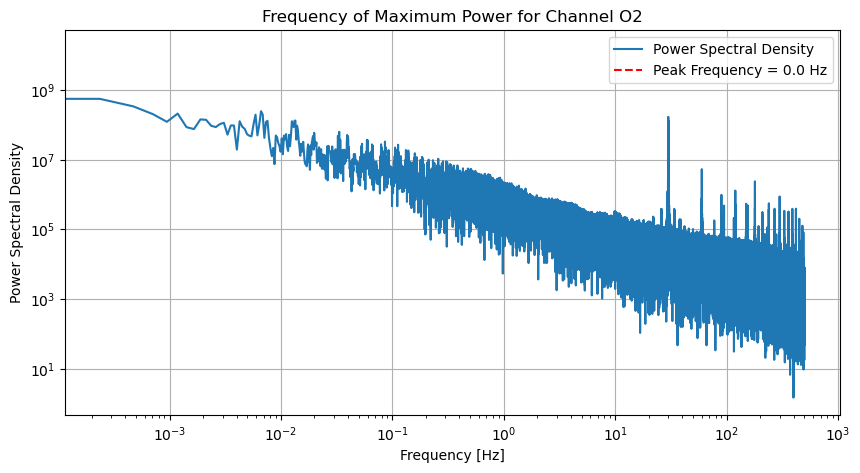

In [102]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']

# Define the sampling frequency
fs = 1000

# Initialize a dictionary to store the frequencies of maximum power for each channel
peak_frequencies = {}

# Loop through each channel and calculate frequency of maximum power
for channel in eeg_channels:
    eeg_data = eeg_df[channel].values # Convert pandas Series to numpy array

    # Perform Fourier transform on the data
    fft_result = scipy.fft.fft(eeg_data)

    # Generate frequencies associated with the Fourier transform values
    frequencies = scipy.fft.fftfreq(len(eeg_data), 1.0/fs)

    # Keep only the positive frequencies (since the spectrum is symmetric)
    positive_frequencies = frequencies[frequencies >= 0]
    positive_fft_result = fft_result[frequencies >= 0]

    # Find the frequency where the absolute value of the Fourier transform is maximum
    peak_frequency = positive_frequencies[np.argmax(np.abs(positive_fft_result))]

    # Add the peak frequency to the dictionary
    peak_frequencies[channel] = peak_frequency

    # Plot the power spectral density and mark the peak frequency
    plt.figure(figsize=(10, 5))
    plt.plot(positive_frequencies, np.abs(positive_fft_result), label='Power Spectral Density')
    plt.axvline(peak_frequency, color='r', linestyle='--', label=f'Peak Frequency = {peak_frequency} Hz')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Frequency of Maximum Power for Channel {channel}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power Spectral Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Save the peak frequencies as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "PeakFrequencies_x.npy"
np.save(results_path + results_file, peak_frequencies)

# Spectral Edge Frequency

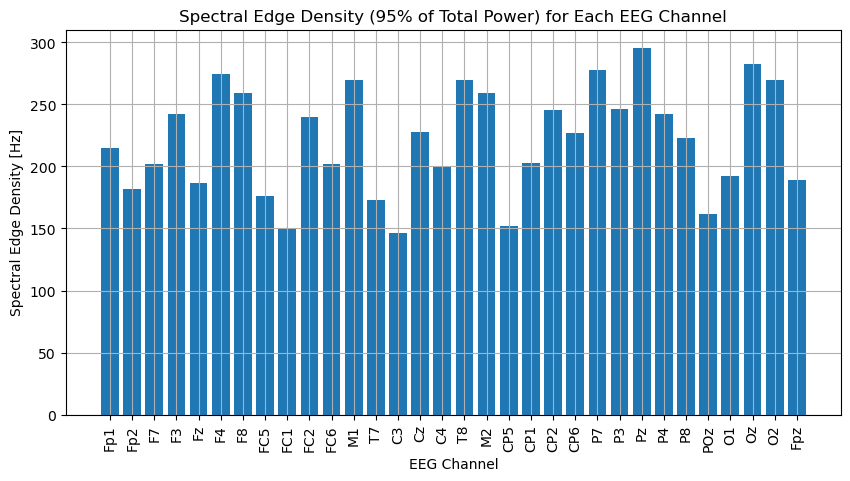

In [106]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2',
               'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2',
               'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'Fpz']

# Define the sampling frequency
fs = 1000

# Define the percentage of the total power used to calculate the spectral edge density
percentage = 95

# Initialize a dictionary to store the spectral edge densities for each channel
spectral_edge_densities = {}

# Loop through each channel and calculate spectral edge density
for channel in eeg_channels:
    eeg_data = eeg_df[channel].values  # Convert pandas Series to numpy array

    # Perform Fourier transform on the data
    fft_result = scipy.fft.fft(eeg_data)

    # Generate frequencies associated with the Fourier transform values
    frequencies = scipy.fft.fftfreq(len(eeg_data), 1.0/fs)

    # Keep only the positive frequencies (since the spectrum is symmetric)
    positive_frequencies = frequencies[frequencies >= 0]
    positive_fft_result = fft_result[frequencies >= 0]

    # Calculate the absolute values of the Fourier transform results
    magnitude = np.abs(positive_fft_result)

    # Sort the magnitude array in descending order
    sorted_magnitude = np.sort(magnitude)[::-1]

    # Calculate the cumulative sum of the sorted magnitude array
    cumulative_sum = np.cumsum(sorted_magnitude)

    # Calculate the threshold based on the specified percentage of total power
    total_power = np.sum(magnitude)
    threshold = total_power * percentage / 100

    # Find the frequency where the cumulative sum first exceeds the threshold
    spectral_edge = positive_frequencies[np.argmax(cumulative_sum >= threshold)]

    # Add the spectral edge density to the dictionary
    spectral_edge_densities[channel] = spectral_edge

# Now, you have the spectral_edge_densities dictionary that contains spectral edge densities for each channel

# Plot the spectral edge densities for each channel
plt.figure(figsize=(10, 5))
plt.bar(spectral_edge_densities.keys(), spectral_edge_densities.values())
plt.title(f'Spectral Edge Density ({percentage}% of Total Power) for Each EEG Channel')
plt.xlabel('EEG Channel')
plt.ylabel('Spectral Edge Density [Hz]')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Save the spectral edge densities as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "SpectralEdgeDensities_x.npy"
np.save(results_path + results_file, spectral_edge_densities)

In [108]:
# Save the spectral edge densities as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "SpectralEdgeDensities_x.npy"
np.save(results_path + results_file, spectral_edge_densities)

# Continuous Wavelet Transform

In [110]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Define a list of all EEG channel names
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Define the sampling frequency
fs = 1000  # Adjust this to your actual sampling frequency

# Define the frequencies at which to compute the wavelet transform
frequencies = np.logspace(np.log10(1), np.log10(fs/2), num=100)  # Adjust the scale range as needed

# Initialize a dictionary to store the wavelet coefficients for each channel
wavelet_coefficients = {}

# Loop through each channel and compute wavelet coefficients
for channel in eeg_channels:
    eeg_data = eeg_df[channel]
    coefficients, freqs = pywt.cwt(eeg_data, frequencies, wavelet='morl')
    wavelet_coefficients[channel] = coefficients

    # Plot the wavelet coefficients
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(coefficients), extent=[0, len(eeg_data), freqs[-1], freqs[0]], aspect='auto', cmap='inferno')
    plt.colorbar(label='Magnitude')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.title(f'Wavelet Coefficients for EEG Channel {channel}')
    plt.show()

# Save the wavelet coefficients as a numpy array
results_path = "/home/vincent/AAA_projects/MVCS/Neuroscience/Analysis/Spectral Analysis/"
results_file = "WaveletCoefficients_x.npy"
np.save(results_path + results_file, wavelet_coefficients)

KeyboardInterrupt: 